In [1]:
import zarr
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

In [6]:
# Load the zarr root (can load a .zip file using zarr.open())
fpath = "data/blue-mtn-unit.zip"
zarr_root = zarr.open(fpath)

# NOTE: you can READ a zarr array as a binary .zip file, but you cannot WRITE.
# in order to write you need to extract to a directory store.
# The following code would load a zarr group as a directory store
# fpath = "data/blue_mtn_unit/"
# zarr_root = zarr.open(fpath)

In [7]:
# Examine the available arrays
zarr_tree = zarr_root.tree()
print(zarr_tree)

/
 ├── canopy
 │   ├── SAV (797, 638, 62) float32
 │   ├── bulk-density (797, 638, 62) float32
 │   └── species-code (797, 638, 62) uint16
 └── surface
     ├── DEM (797, 638) float32
     ├── FMC (797, 638) float32
     ├── SAV (797, 638) float32
     ├── bulk-density (797, 638) float32
     ├── fuel-depth (797, 638) float32
     └── fuel-model-sb40 (797, 638) uint8


In [8]:
# View zarr array attributes
zarr_root.attrs.keys()

dict_keys(['dx', 'dy', 'dz', 'nx', 'ny', 'nz', 'pad', 'sparse_array', 'xmax', 'xmin', 'ymax', 'ymin'])

In [9]:
# Look at the canopy group
canopy = zarr_root["canopy"]

In [10]:
# Get the 3D species code as a zarr array.
# At this point the array is not in memory.
species_code_zarr = canopy["species-code"]

# Convert the zarr array to a numpy array.
# NOW the array is in memory.
species_code_np = species_code_zarr[...]
species_code_np.shape

(797, 638, 62)

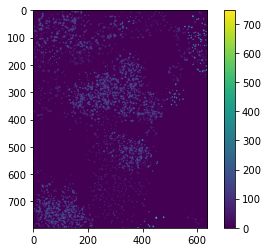

In [19]:
# Plot a slice of the 3D array at z = 15
species_code_slice = species_code_np[..., 15]
plt.imshow(species_code_slice)
plt.colorbar()
plt.show()

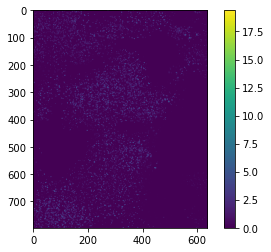

In [20]:
# Plot a 2D sum of the 3D bulk density canopy array
data = canopy["bulk-density"][...]
data_sum = np.sum(data, axis=2)
plt.imshow(data_sum)
plt.colorbar()
plt.show()

In [21]:
# Examine a 3D plot of canopy bulk density
# Go from yxz to xyz
data = np.swapaxes(data, 0, 1)

# move zeros to -1 for thresholding
data[data == 0] = -1

# convert the 3D array to a Pyvista UniformGrid
grid = pv.UniformGrid()
grid.dimensions = np.array(data.shape) + 1
grid.spacing = [1, 1, 1]
grid.cell_data['values'] = data.flatten(order='F')
grid = grid.threshold(0)

# Plot the grid
pv.set_plot_theme('document')
grid.plot(cmap='summer')

2022-10-10 13:42:43.041 (2971.973s) [           3570A]       vtkThreshold.cxx:84    WARN| vtkThreshold::ThresholdByUpper was deprecated for VTK 9.1 and will be removed in a future version.


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [22]:
# Examine the surface fuel-depth
surface = zarr_root["surface"]
fuel_depth_zarr = surface["fuel-depth"]
fuel_depth_np = fuel_depth_zarr[...]
fuel_depth_np.shape

(797, 638)

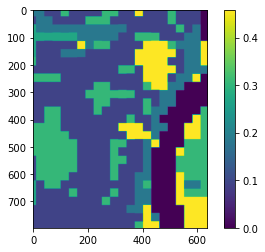

In [23]:
# Plot the 2D fuel depth array
plt.imshow(fuel_depth_np)
plt.colorbar()
plt.show()

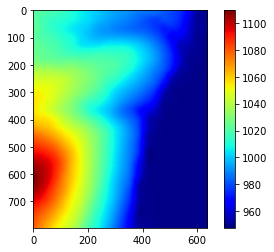

In [24]:
# Plot the DEM
plt.imshow(surface["DEM"][...], cmap="jet")
plt.colorbar()
plt.show()

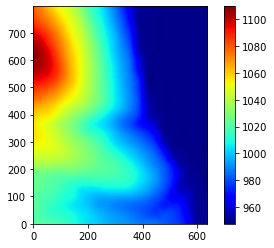

In [25]:
# Recall that FastFuels is oriented South (upper) to North (lower), like QUIC-Fire.
# To view the actual world coordinates plot the DEM with origin="lower"
plt.imshow(surface["DEM"][...], cmap="jet", origin="lower")
plt.colorbar()
plt.show()

In [26]:
# Examine fuel model information
print(surface["fuel-model-sb40"].attrs["fuel-model"])

{'map': {'91': 'NB1', '92': 'NB2', '93': 'NB3', '98': 'NB8', '99': 'NB9', '101': 'GR1', '102': 'GR2', '103': 'GR3', '104': 'GR4', '105': 'GR5', '106': 'GR6', '107': 'GR7', '108': 'GR8', '109': 'GR9', '121': 'GS1', '122': 'GS2', '123': 'GS3', '124': 'GS4', '141': 'SH1', '142': 'SH2', '143': 'SH3', '144': 'SH4', '145': 'SH5', '146': 'SH6', '147': 'SH7', '148': 'SH8', '149': 'SH9', '161': 'TU1', '162': 'TU2', '163': 'TU3', '164': 'TU4', '165': 'TU5', '181': 'TL1', '182': 'TL2', '183': 'TL3', '184': 'TL4', '185': 'TL5', '186': 'TL6', '187': 'TL7', '188': 'TL8', '189': 'TL9', '201': 'SB1', '202': 'SB2', '203': 'SB3', '204': 'SB4'}, 'name': 'SB40'}


In [27]:
# Note that fuel models 91-99 represent cells with no fuel (agriculture, water, ice, etc.)
# Thus, to determine if your array contains non-fuel carrying cells a check like that below should work
print(np.any(surface["fuel-model-sb40"][...] < 100))

True


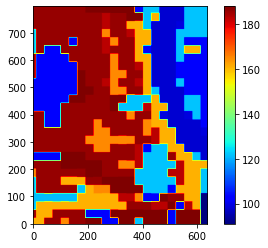

In [28]:
# Plot the surface fuel models
plt.imshow(surface["fuel-model-sb40"][...], cmap="jet", origin="lower")
plt.colorbar()
plt.show()